## Import Libraries

In [0]:
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Neural Networks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, MaxPooling2D, Conv2D, BatchNormalization
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.utils.np_utils import to_categorical


## Load Dataset

In [0]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [5]:
train_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> First column is the target.

In [6]:
train_dataset.shape

(42000, 785)

Splitting of dataset to features and labels

In [0]:
#Features
train_X = train_dataset.iloc[:,1:]
test_X = test_dataset

#Label
train_y = train_dataset.iloc[:,0]

In [8]:
train_y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

One hot encoding of Label

In [9]:
train_y = to_categorical(train_y)
train_y.shape

(42000, 10)

## Image Pre-processing

Reshaping of data

In [0]:
train_X = train_X.values.reshape(-1, 28, 28, 1)
test_X = test_X.values.reshape(-1, 28, 28, 1)

In [0]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [12]:
train_X.shape

(42000, 28, 28, 1)

Normalizing data

In [0]:
train_X /= 255
test_X /= 255

## Training and Validation Sets

In [0]:
X_train, X_dev, y_train, y_dev = train_test_split(train_X, train_y, test_size=0.05)

In [15]:
print("Training Shape:", X_train.shape)
print("Dev Shape:", X_dev.shape)

Training Shape: (39900, 28, 28, 1)
Dev Shape: (2100, 28, 28, 1)


## Model Building

### Simple Convolutional Neural Network

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2769408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 2,774,858
Trainable params: 2,774,858
Non-trainable params: 0
____________________________________________

In [0]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_dev, y_dev))

Train on 39900 samples, validate on 2100 samples
Epoch 1/10
39900/39900 [==============================] - 17s 433us/step - loss: 0.2100 - accuracy: 0.9355 - val_loss: 0.0871 - val_accuracy: 0.9714
Epoch 2/10
39900/39900 [==============================] - 11s 279us/step - loss: 0.0832 - accuracy: 0.9744 - val_loss: 0.0620 - val_accuracy: 0.9786
Epoch 3/10
39900/39900 [==============================] - 11s 277us/step - loss: 0.0580 - accuracy: 0.9815 - val_loss: 0.0707 - val_accuracy: 0.9786
Epoch 4/10
39900/39900 [==============================] - 11s 277us/step - loss: 0.0425 - accuracy: 0.9857 - val_loss: 0.0789 - val_accuracy: 0.9781
Epoch 5/10
39900/39900 [==============================] - 11s 282us/step - loss: 0.0333 - accuracy: 0.9885 - val_loss: 0.0730 - val_accuracy: 0.9771
Epoch 6/10
39900/39900 [==============================] - 11s 287us/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0858 - val_accuracy: 0.9762
Epoch 7/10
39900/39900 [==============================] -

Bias and Variance tradeoff

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

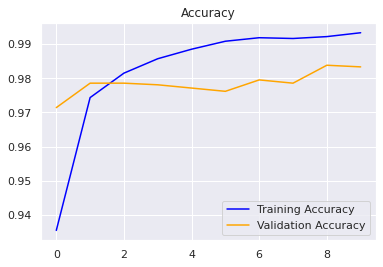

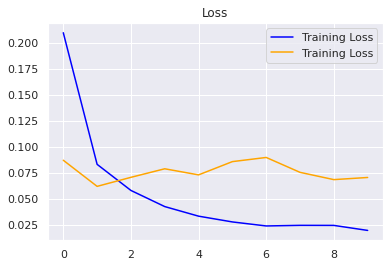

In [21]:
sns.set()
plt.plot(epochs, acc, 'blue', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'orange', label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label = 'Training Loss')
plt.plot(epochs, val_loss, 'orange', label = 'Training Loss')
plt.title('Loss')
plt.legend()
plt.show()

## Print Predictions

In [0]:
ANN_Result = model.predict(test_X)

In [0]:
ANN_Result = np.argmax(ANN_Result,axis = 1)
ANN_Result = pd.Series(ANN_Result,name="Label")

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),ANN_Result],axis = 1)
submission.to_csv("Digit_recognizer.csv",index=False)